# Binding classification with XGBoost


----

- Cross validation using the all data

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)

- This is the best i can do now


----

In [1]:
import os,sys
os.environ['THEANO_FLAGS']='device=cpu'

#my functions
sys.path.append('../')
from utils import load_all_data,my_xgb_cv_predict,plot_roc,bootstrap_auc

#go to working dir
os.chdir(os.environ['MHC_DATA'])

%matplotlib inline

Using Theano backend.
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Load data

In [2]:
x,_,y_c=load_all_data(hla_representation='one-hot',
    species_representation='one-hot',
    seq_representation='one-hot')

### Train

In [3]:
#model params
params = {'max_depth':20,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,x,y_c,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.856623	eval-auc:0.828064
[500]	train-auc:0.979797	eval-auc:0.929253
[1000]	train-auc:0.990208	eval-auc:0.933211
[1500]	train-auc:0.994272	eval-auc:0.934029
Stopping. Best iteration:
[1479]	train-auc:0.994155	eval-auc:0.934043

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.835145	eval-auc:0.820510
[500]	train-auc:0.979056	eval-auc:0.929143
[1000]	train-auc:0.989967	eval-auc:0.933009
[1500]	train-auc:0.994083	eval-auc:0.934026
Stopping. Best iteration:
[1577]	train-auc:0.994508	eval-auc:0.934109

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.860317	eval-auc:0.843744
[500]	train-auc:0.979384	eval-auc:0.931272
[1000]	train-auc:0.990187	eval-auc:0.934665
[1500]	train-auc:0.994189	eval-auc:0.935623
[2000]	train-auc:0.996274	eval-auc:0.936021
Stopping. Best iteration:
[2276]	train-auc:0.997098	eval-auc:0.936188

Will train until eval error hasn't decreased in

### ROC plot

AUC: 0.936339264658


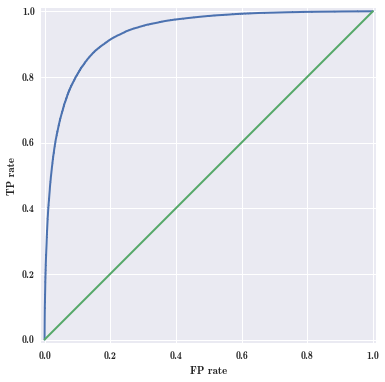

In [5]:
plot_roc(y_c,y_pred)

### Bootstrap AUC

In [20]:
bootstrap_auc(y_c,y_pred,N=100)

Score is : 0.9363 +- 0.0006
